In [1]:
from retsupp.utils.data import Subject, get_subject_ids

from tqdm.contrib.itertools import product
import pandas as pd
import seaborn as sns

In [2]:
outliers = []
confounds = []
keys = []

for subject, session, run in product(get_subject_ids(), [1,2], list(range(1, 7))):

    try:
        cf = sub = Subject(subject).get_confounds(session=session, run=run, filter_confounds=True)
        cf = cf[[column for column in cf.columns if column.startswith('motion_outlier')]]

        outliers.append({'subject':subject,
                        'session':session,
                        'run':run,
                        'n_motion_outliers':len(cf.columns),
                        'prop_motion_outliers':len(cf.columns) / cf.shape[0]})

        confounds.append(cf)
        keys.append((subject, session, run))
    except FileNotFoundError:
        print(f'No confounds found for subject {subject}, session {session}, run {run}')

outliers = pd.DataFrame(outliers)
confounds = pd.concat(confounds, keys=keys, names=['subject', 'session', 'run', 'timepoint'])


  0%|          | 0/360 [00:00<?, ?it/s]

No confounds found for subject 20, session 1, run 6
No confounds found for subject 24, session 1, run 1
No confounds found for subject 24, session 1, run 2
No confounds found for subject 24, session 1, run 3
No confounds found for subject 24, session 1, run 4
No confounds found for subject 24, session 1, run 5
No confounds found for subject 24, session 1, run 6
No confounds found for subject 24, session 2, run 1
No confounds found for subject 24, session 2, run 2
No confounds found for subject 24, session 2, run 3
No confounds found for subject 24, session 2, run 4
No confounds found for subject 24, session 2, run 5
No confounds found for subject 24, session 2, run 6


/Users/gdehol/mambaforge/envs/retsupp/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


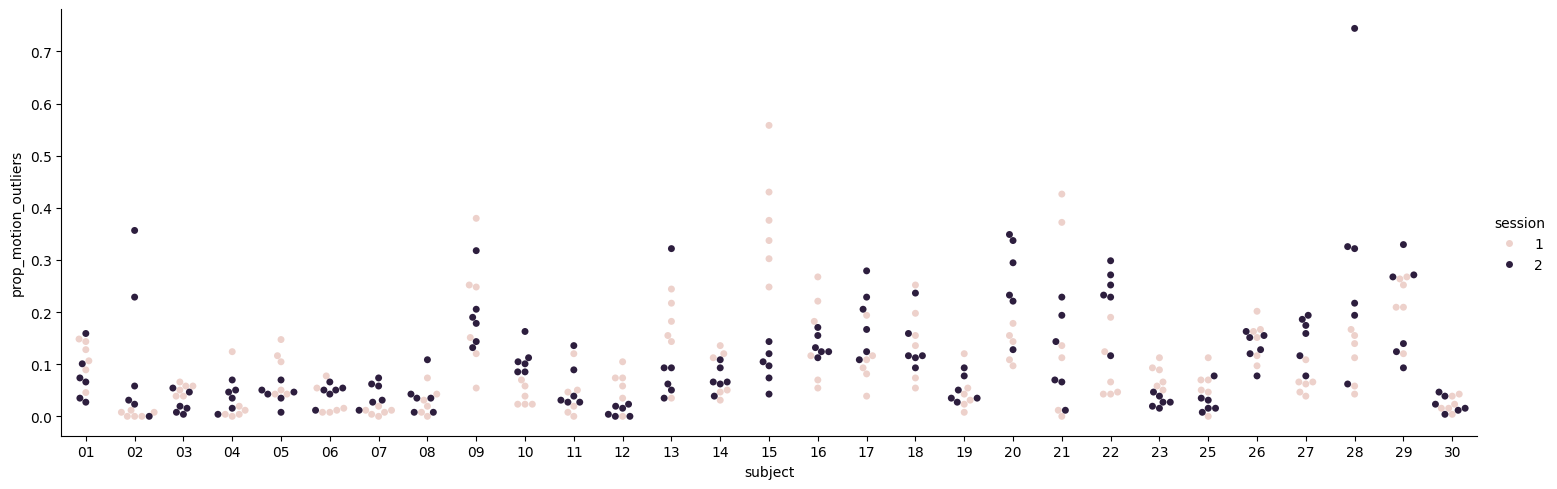

In [3]:
sns.catplot(data=outliers, x='subject', y='prop_motion_outliers', kind='swarm', aspect=3., hue='session')

In [4]:
outliers.sort_values('prop_motion_outliers', ascending=False)

,subject,session,run,n_motion_outliers,prop_motion_outliers
317,28,2,1,192,0.744186
172,15,1,5,144,0.558140
169,15,1,2,111,0.430233
242,21,1,4,110,0.426357
97,09,1,2,98,0.379845
...,...,...,...,...,...
16,02,1,5,0,0.000000
141,12,2,4,0,0.000000
136,12,1,5,0,0.000000
19,02,2,2,0,0.000000


<Axes: xlabel='prop_motion_outliers', ylabel='Proportion'>

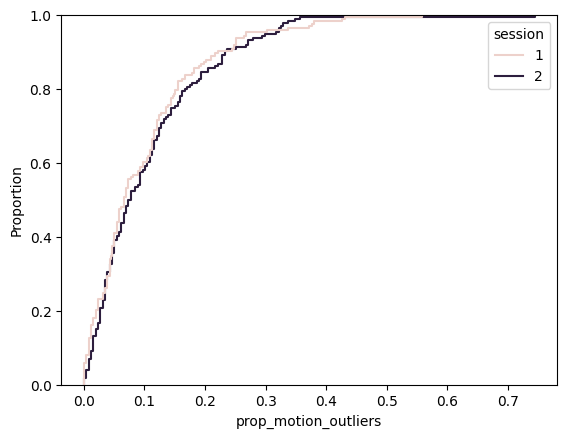

In [5]:
# plot cdf

sns.ecdfplot(data=outliers, x='prop_motion_outliers', hue='session')
# outliers['prop_motion_outliers'].sort_values().reset_index(drop=True).plot(kind='line', marker='o')



In [6]:
confounds.loc[('01', 1, 1), :]

,motion_outlier00,motion_outlier01,motion_outlier02,motion_outlier03,motion_outlier04,motion_outlier05,motion_outlier06,motion_outlier07,motion_outlier08,motion_outlier09,...,motion_outlier182,motion_outlier183,motion_outlier184,motion_outlier185,motion_outlier186,motion_outlier187,motion_outlier188,motion_outlier189,motion_outlier190,motion_outlier191
timepoint,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
cf.isnull().any(axis=0)

motion_outlier00    False
motion_outlier01    False
motion_outlier02    False
motion_outlier03    False
motion_outlier04    False
motion_outlier05    False
motion_outlier06    False
motion_outlier07    False
motion_outlier08    False
motion_outlier09    False
motion_outlier10    False
motion_outlier11    False
dtype: bool

In [8]:
cf = confounds.loc[('01', 1, 6), ]
plt.imshow(cf.loc[:, ~cf.isnull().any(axis=0)].T, aspect=1, cmap='gray', interpolation='nearest')

NameError: name 'plt' is not defined

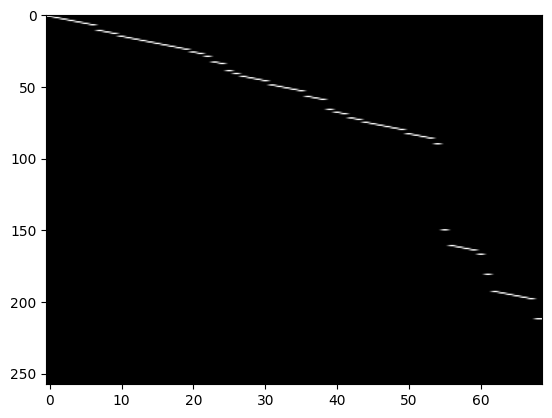

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(confounds, aspect='auto', cmap='gray')

In [ ]:


sub = Subject('01')


cf = sub.get_confounds(session=1, run=1, filter_confounds=True)


cf = cf[[column for column in cf.columns if column.startswith('motion_outlier')]]

cf.idxmax(0)

motion_outlier00     20
motion_outlier01     21
motion_outlier02     22
motion_outlier03     23
motion_outlier04     45
motion_outlier05     57
motion_outlier06     58
motion_outlier07     71
motion_outlier08    103
motion_outlier09    190
motion_outlier10    232
motion_outlier11    233
dtype: int64